In [1]:
import logging
import random

from backstrip import backplot
from nbmetalog import nbmetalog as nbm
import pandas as pd
from teeplot import teeplot as tp

random.seed(1)

logging.basicConfig(
    format="[%(funcName)s:%(lineno)d] %(message)s",
)
logger = logging.getLogger()


In [2]:
nbm.print_metadata()


context: ci
hostname: fv-az569-990
interpreter: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
nbcellexec: null
nbname: benchmark
nbpath: /home/runner/work/wse-sketches/wse-sketches/binder/benchmark.ipynb
revision: null
session: 7d1463e9-f9a1-4c49-ab8d-5f8de6188cbb
timestamp: 2024-04-06T15:09:21Z00:00


IPython==8.20.0
keyname==0.6.0
yaml==6.0.1
logging==0.5.1.2
nbmetalog==0.2.6
pandas==1.5.3
teeplot==1.0.1
re==2.2.1
comm==0.2.1
psutil==5.9.8
zmq==25.1.2
json==2.0.9
ipykernel==6.29.0


## Get Data


In [3]:
df = pd.read_csv("https://osf.io/egjxr/download")


In [4]:
df["Nanoseconds per Op"] = df["Nanoseconds"] / df["Num Operations"]


## Statistics


nanoseconds per op mean & SE


In [5]:
dfg = df.groupby(["Policy"]).agg(["mean", "sem"])
dfg


/tmp/ipykernel_3158/1182473837.py:1: FutureWarning: ['Implementation', 'Language'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dfg = df.groupby(["Policy"]).agg(["mean", "sem"])


Nanoseconds                Replicate           Num Operations  \
                       mean            sem      mean       sem           mean   
Policy                                                                          
tilted         2.330914e+08  893697.214521       9.5  1.322876      1000000.0   
tilted-sticky  2.875057e+08  476339.653381       9.5  1.322876      1000000.0   
trivial        4.946814e+06    3072.984819       9.5  1.322876      1000000.0   

                   Surface Size      Nanoseconds per Op            
               sem         mean  sem               mean       sem  
Policy                                                             
tilted         0.0         64.0  0.0         233.091439  0.893697  
tilted-sticky  0.0         64.0  0.0         287.505653  0.476340  
trivial        0.0         64.0  0.0           4.946814  0.003073

op to trivial ratio


In [6]:
df["Trivial Ratio"] = (
    df["Nanoseconds"]
    / df[(df["Policy"] == "trivial")]["Nanoseconds"].mean()
)
df.groupby(["Policy"])["Trivial Ratio"].agg(["mean", "sem"])


,mean,sem
Policy,,
tilted,47.119506,0.180661
tilted-sticky,58.119356,0.096292
trivial,1.000000,0.000621


## Visualize Results


teeplots/orient=h+viz=backplot+x=nanoseconds-per-op+y=policy+ext=.pdf


teeplots/orient=h+viz=backplot+x=nanoseconds-per-op+y=policy+ext=.png


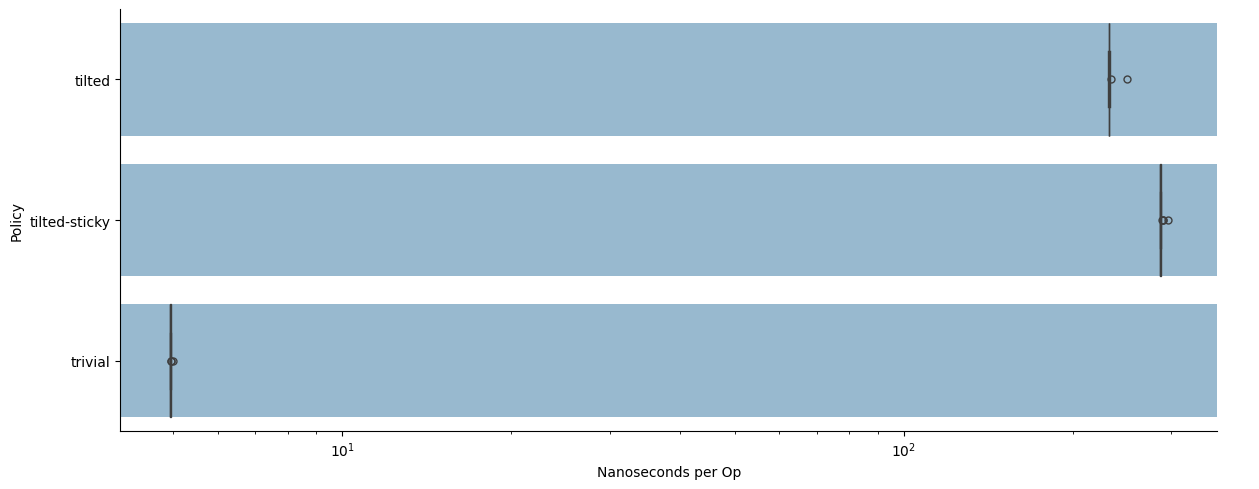

In [7]:
tp.tee(
    backplot,
    data=df,
    y="Policy",
    x="Nanoseconds per Op",
    orient="h",
    aspect=2.5,
    log_scale=(True, False),
)
